# Agenda  <a name="backtotop"></a>
---

1. [Bar Graph](#BarGraph)
2. [Line Graph](#LineGraph)
3. [Scatter Plot](#ScatterPlot)
4. [Box Plot](#Boxplot)
5. [Network](#Network)
6. [Secondary Y Axis](#secondaryYAxis)

## Bar Graph <a name="BarGraph">
</a>


[back to top](#backtotop)

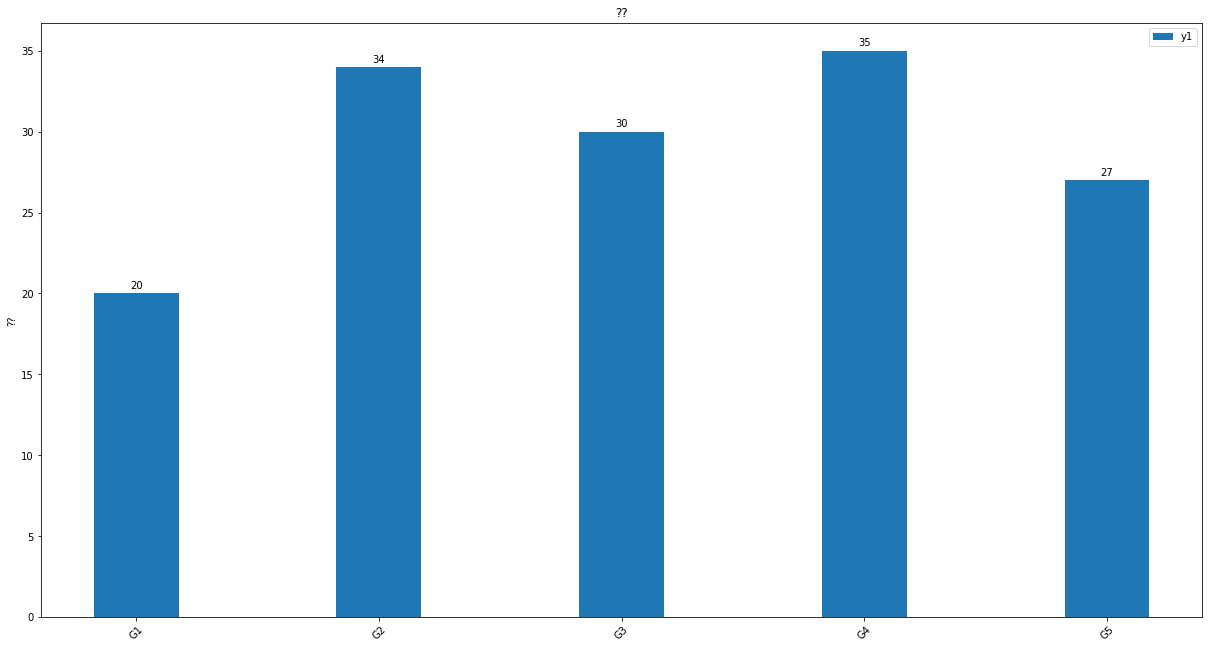

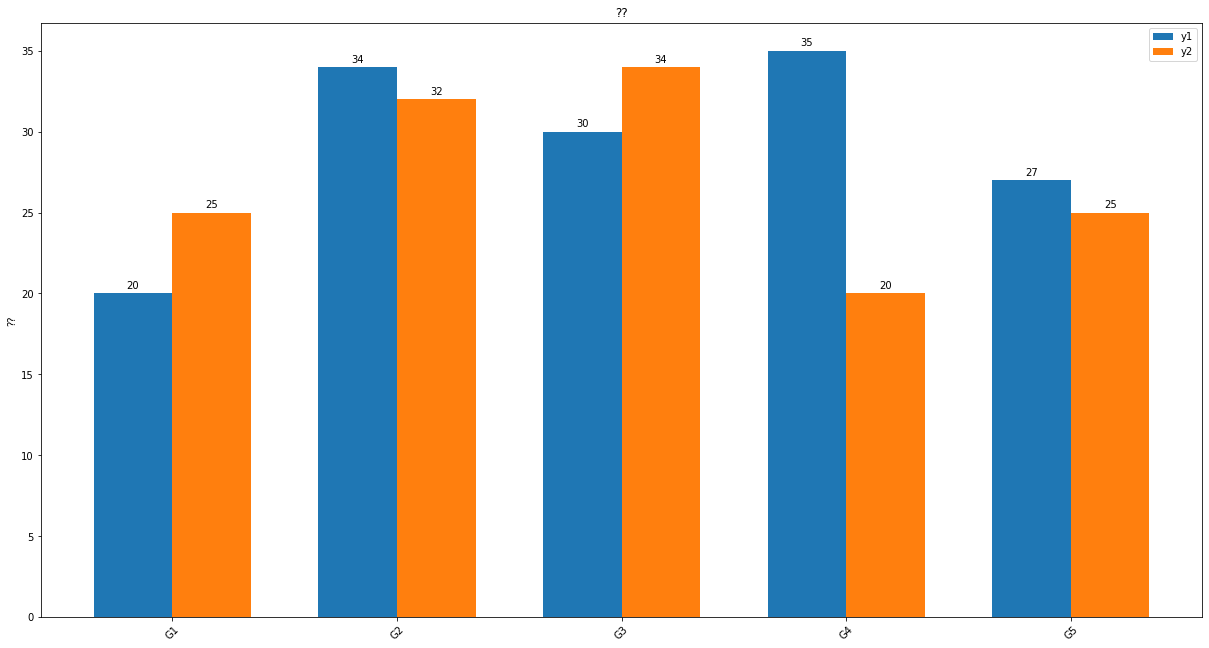

In [5]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = ['G1', 'G2', 'G3', 'G4', 'G5']
men_means = [20, 34, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]

def PlotBarGraph(x, y1, y2 = None):
    x_range = np.arange(len(x))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots()
    if y2:
        rects1 = ax.bar(x_range - width/2, y1, width, label='y1')
        rects2 = ax.bar(x_range + width/2, y2, width, label='y2')
    else:
        rects1 = ax.bar(x_range, y1, width, label='y1')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('??')
    ax.set_title('??')
    ax.set_xticks(x_range)
    ax.tick_params(axis = 'x', rotation = 45)
    ax.set_xticklabels(x)
    ax.legend()


    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')


    autolabel(rects1)
    if y2:
        autolabel(rects2)
    

    fig.tight_layout()
    fig.set_size_inches(18.5, 10.5)

    return plt.show()
    
    
PlotBarGraph(labels, men_means)
PlotBarGraph(labels, men_means, women_means)
plt.show()

## Line Graph <a name="LineGraph">
</a>


[back to top](#backtotop)

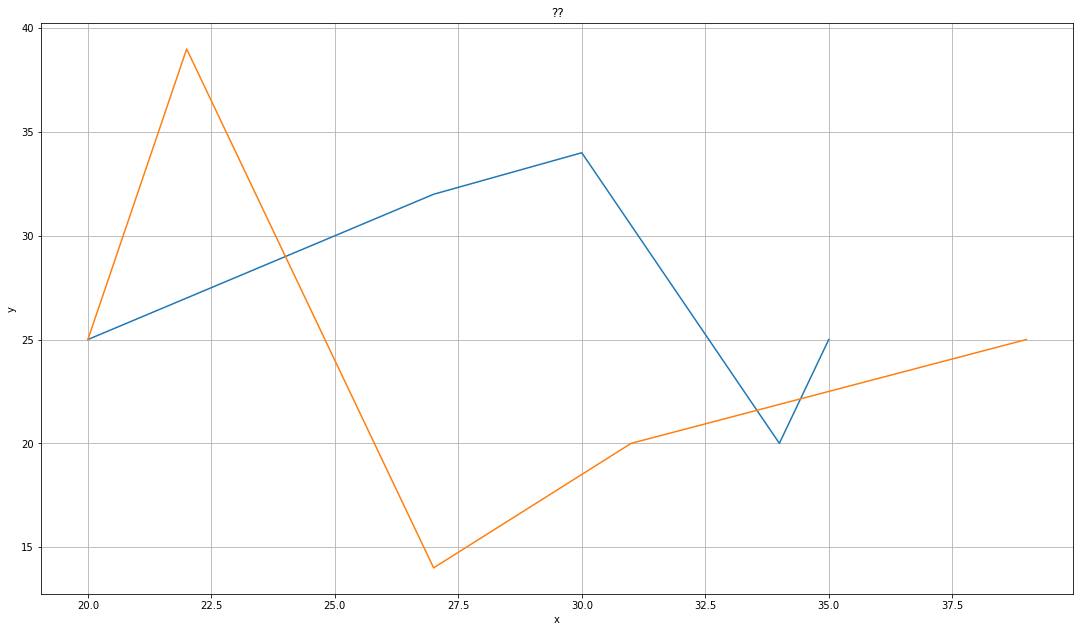

In [4]:
x1 = sorted([20, 34, 30, 35, 27])
y1 = [25, 32, 34, 20, 25]

x2 = sorted([20, 39, 31, 22, 27])
y2 = [25, 39, 14, 20, 25]

def PlotLineGraph(nested_xy_list, path = None):
    fig, ax = plt.subplots()
    for xy in nested_xy_list:
        ax.plot(xy[0], xy[1])
    ax.set(xlabel = 'x', ylabel= 'y',
        title = '??')
    ax.grid()
    if path:
        fig.savefig(path)
    fig.set_size_inches(18.5, 10.5)
    plt.show()

nested_xy_list = [[x1, y1], [x2, y2]]
PlotLineGraph(nested_xy_list)

## Scatter Plot by Seaborn <a name="ScatterPlot">
</a>


[back to top](#backtotop)

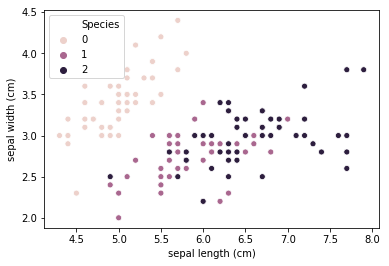

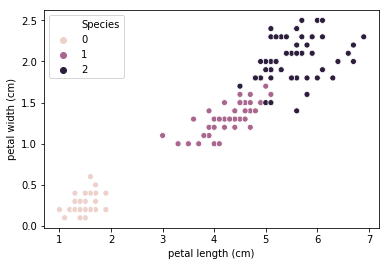

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = load_iris()
Iris_df = pd.DataFrame(data.data, columns=data.feature_names)
Iris_df["Species"] = data.target
x_train, x_test, y_train, y_test = train_test_split(data.data, data.target,
                                                    test_size = 0.1, random_state = 3)

#---------------------------------------------------------------------------------------------------
sns.scatterplot(x = 'sepal length (cm)', y = 'sepal width (cm)', data = Iris_df, hue= 'Species')
plt.show()
sns.scatterplot(x = 'petal length (cm)', y = 'petal width (cm)', data = Iris_df, hue= 'Species')
plt.show()

## Boxplot<a name="Boxplot">
</a>


[back to top](#backtotop)

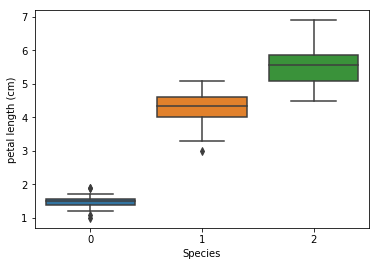

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = load_iris()
Iris_df = pd.DataFrame(data.data, columns=data.feature_names)
Iris_df["Species"] = data.target
x_train, x_test, y_train, y_test = train_test_split(data.data, data.target,
                                                    test_size = 0.1, random_state = 3)


#---------------------------------------------------------------------------------------------------
sns.boxplot(x = "Species", y = "petal length (cm)", data = Iris_df)

## Network<a name="network">
</a>

The following function shows the minimum spanning tree by red edges

[back to top](#backtotop)

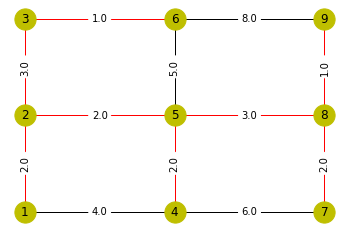

In [69]:
G4 = nx.Graph()
list_edges = [(1,2,2.0) , (1,4,4.0) , (2,3,3.0) , (2,5,2.0) , (3,6,1.0) , (4,5,2.0) , (4,7,6.0) , (5,6,5.0) , (5,8,3.0) , (6,9,8.0) , (8,9,1.0) , (7,8,2.0)]
G4.add_weighted_edges_from(list_edges)
G4.node[1]['pos'] = (0,0)
G4.node[2]['pos'] = (0,2)
G4.node[3]['pos'] = (0,4)
G4.node[4]['pos'] = (2,0)
G4.node[5]['pos'] = (2,2)
G4.node[6]['pos'] = (2,4)
G4.node[7]['pos'] = (4,0)
G4.node[8]['pos'] = (4,2)
G4.node[9]['pos'] = (4,4)

T = nx.minimum_spanning_tree(G4)

node_pos=nx.get_node_attributes(G4,'pos')
edge_weight=nx.get_edge_attributes(G4,'weight')
red_edges = T.edges()
node_col = ['y']
# If the edge is in the shortest path set it to red, else set it to white color
edge_col = ['black' if not edge in red_edges else 'red' for edge in G4.edges()]
# Draw the nodes
nx.draw_networkx(G4, node_pos,node_color= node_col, node_size=450)
# Draw the node labels
# nx.draw_networkx_labels(G4, node_pos,node_color= node_col)
# Draw the edges
nx.draw_networkx_edges(G4, node_pos,edge_color= edge_col)
# Show weights
nx.draw_networkx_edge_labels(G4, node_pos,edge_color= edge_col, edge_labels=edge_weight)
# Remove the axis
plt.axis('off')
# Show the plot
plt.show()
G4.clear()

## Secondary Y Axis<a name="secondaryYAxis">
</a>


[back to top](#backtotop)

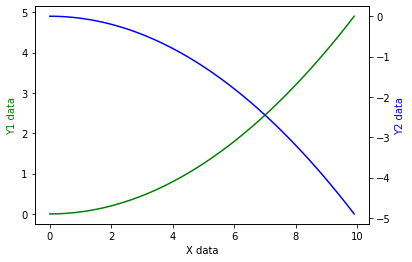

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(0, 10, 0.1)
y1 = 0.05 * x**2
y2 = -1 *y1

def plot2yaxis(x, y1, y2):
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    ax1.plot(x, y1, 'g-')
    ax2.plot(x, y2, 'b-')

    ax1.set_xlabel('X data')
    ax1.set_ylabel('Y1 data', color='g')
    ax2.set_ylabel('Y2 data', color='b')

    plt.show()

plot2yaxis(x, y1, y2)